Required Library

In [224]:
import pandas as pd

Load Dataset

In [225]:
data_path = "F:/git/projects/DS/projects/House_price_prediction/data/raw/housing.csv"  #file path
df = pd.read_csv(data_path)  #save data in df

Display Basic information about dataset

In [226]:
print("Dataset Overview:")
print(df.info()) # Column types and non-null values

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [227]:
print("\nFirst few rows of the dataset:")
print(df.head()) # Preview first few rows


First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Check Missing Values

In [228]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Series([], dtype: int64)


In [229]:
#Required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plot into histogram

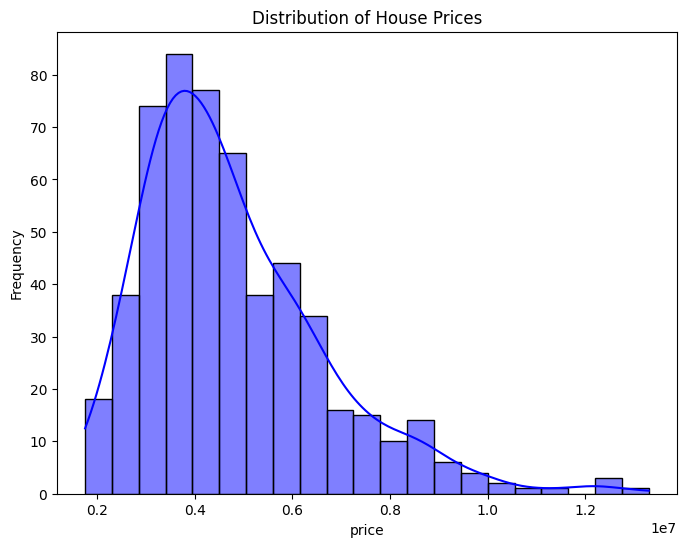

In [230]:
plt.figure(figsize=(8, 6))  #Size of histogram
sns.histplot(df['price'], kde=True, color='blue')  #plot column with color blue
plt.title('Distribution of House Prices')  #Title of histogram
plt.xlabel('price')  #label x-axis as price
plt.ylabel('Frequency')  #label y-axis as frequency
plt.show()  #show histogram

Ignore non numeric columns

In [231]:
# Automatically exclude non-numeric columns
correlation = df.select_dtypes(include=['number']).corr()['price'].sort_values(ascending=False)
print("\nTop features correlated with price:")
print(correlation.head(10))



Top features correlated with price:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


Visualize relations with key features

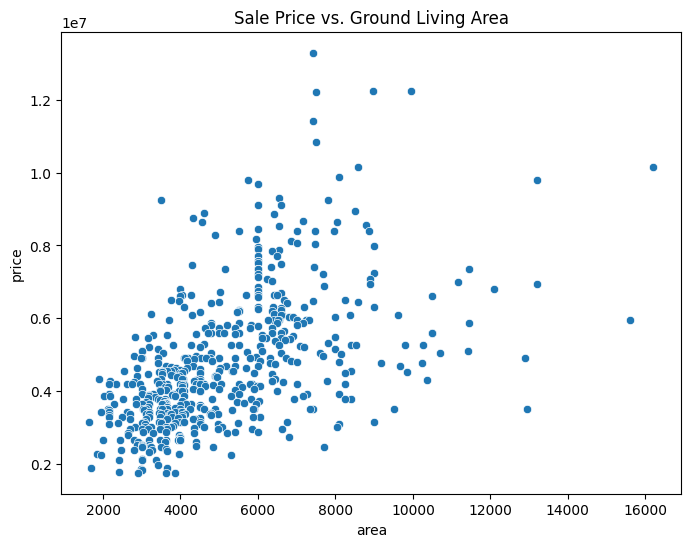

In [232]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title('Sale Price vs. Ground Living Area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

Apply feature engineering to handle non linearity in columns

In [233]:
import numpy as np
df['Log_Area'] = np.log1p(df['area'])  # Log transform to handle non-linearity


In [234]:
# Define features (X) and target (y)
X = df.drop(columns=['area', 'price'])  # Drop 'area' after transformation, keep 'Log_Area'
y = df['price']

In [235]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Initialize the encoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# For training data
X_train_categorical = X_train.select_dtypes(include='object')  # Select only categorical columns
encoder.fit(X_train_categorical)  # Fit the encoder on training data
X_train[X_train_categorical.columns] = encoder.transform(X_train_categorical)

# For test data
X_test_categorical = X_test.select_dtypes(include='object')  # Select only categorical columns
X_test[X_test_categorical.columns] = encoder.transform(X_test_categorical)


In [236]:
X_test['area'] = df.loc[X_test.index, 'area']

# Assuming X_test is your test data (the same structure as the training data)
X_test['Log_Area'] = np.log1p(X_test['area'])  # Apply the same log transformation

X_test = X_test.drop(columns=['area'])



Encode non numeric binary catagorical column 

In [237]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


Apply Multi-colinearity to see co-relations

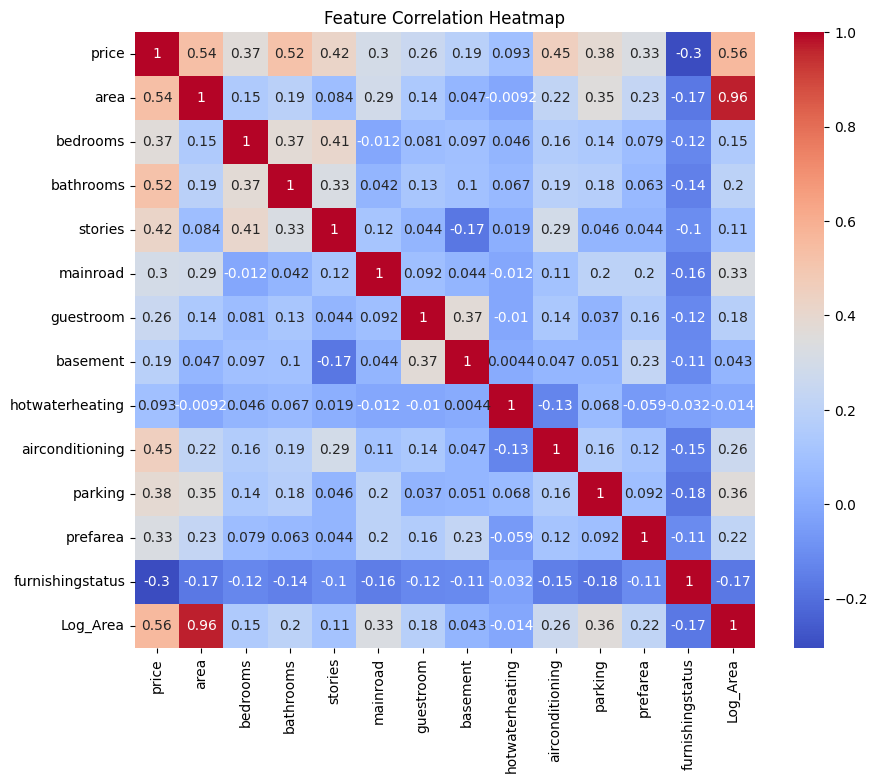

In [238]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [239]:
# Assume X_train is your training data
le_dict = {}  # Dictionary to store LabelEncoders for each column



In [240]:
# After encoding, the test data may have a different number of columns (due to dummy variables).
# Make sure the test data has the same columns as the training data by aligning columns.

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [241]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'yes'

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Example usage
y_pred = dt_model.predict(X_test)


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


Split Data into Traing and Testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap


In [ ]:

# Define features (X) and target (y)
X = df.drop(columns=['area'])  # Replace 'area' with the feature you want to exclude from training
y = df['price']

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 57213120389.90826
R^2 Score: 0.988680912995301


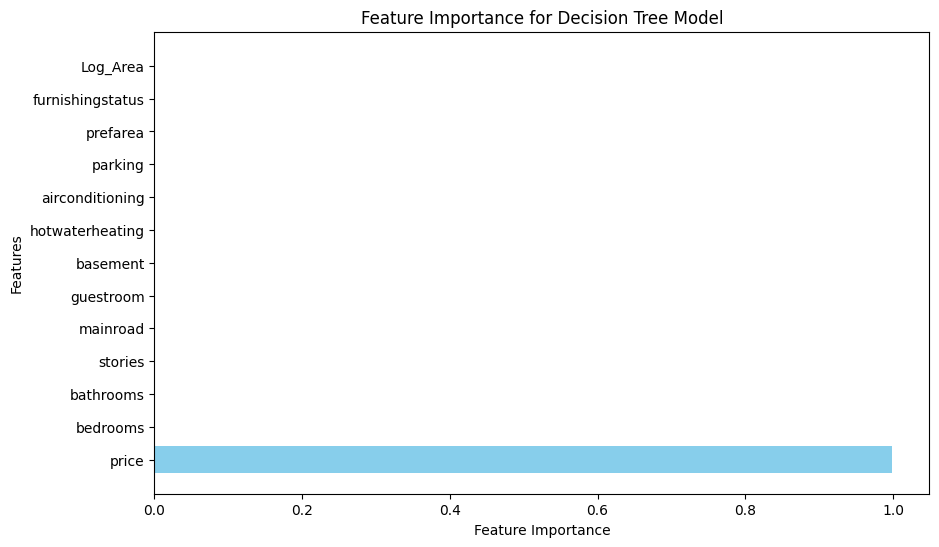

In [ ]:
# Plot feature importance
feature_importance = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Decision Tree Model')
plt.show()

In [ ]:
# Use TreeExplainer for SHAP analysis
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
# Print the shape of SHAP values
print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)

SHAP values shape: (109, 13)
X_test shape: (109, 13)


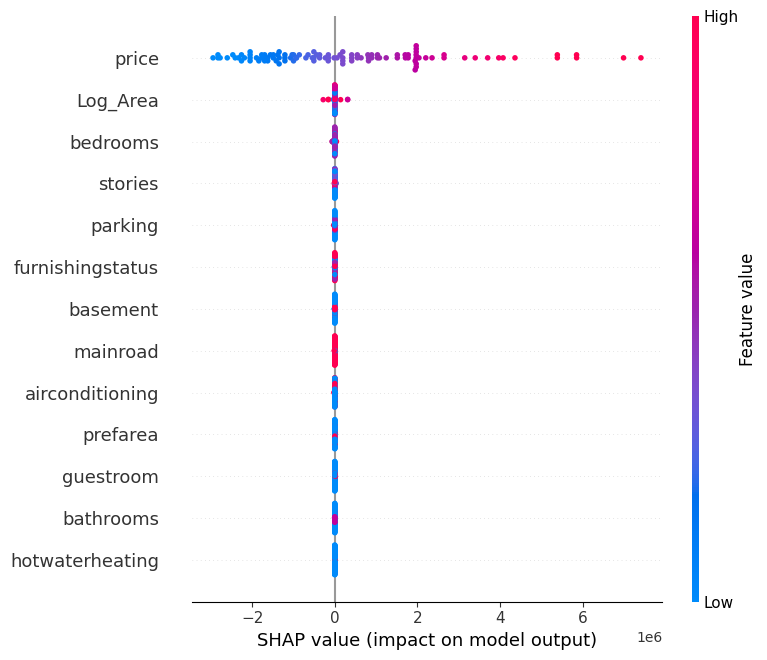

In [ ]:
# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)

SHAP values shape: (109, 13)
X_test shape: (109, 13)


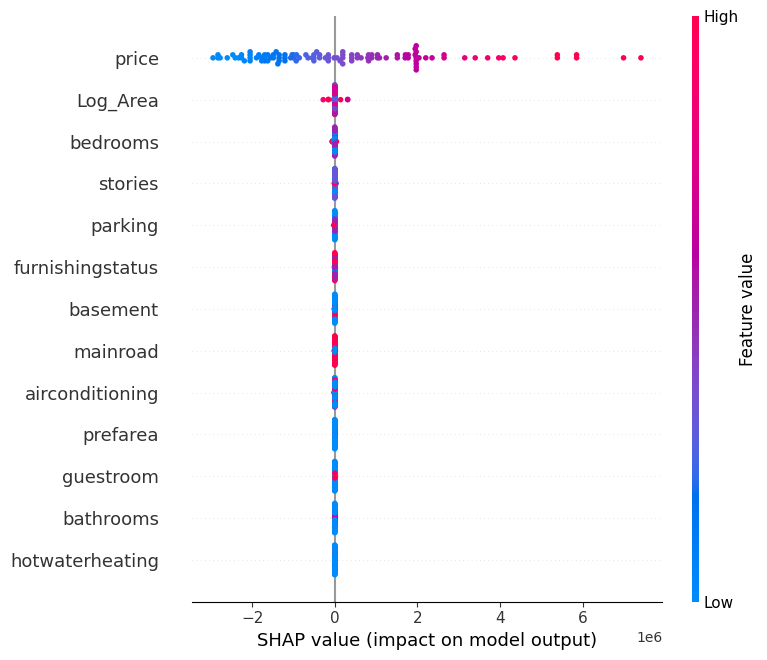

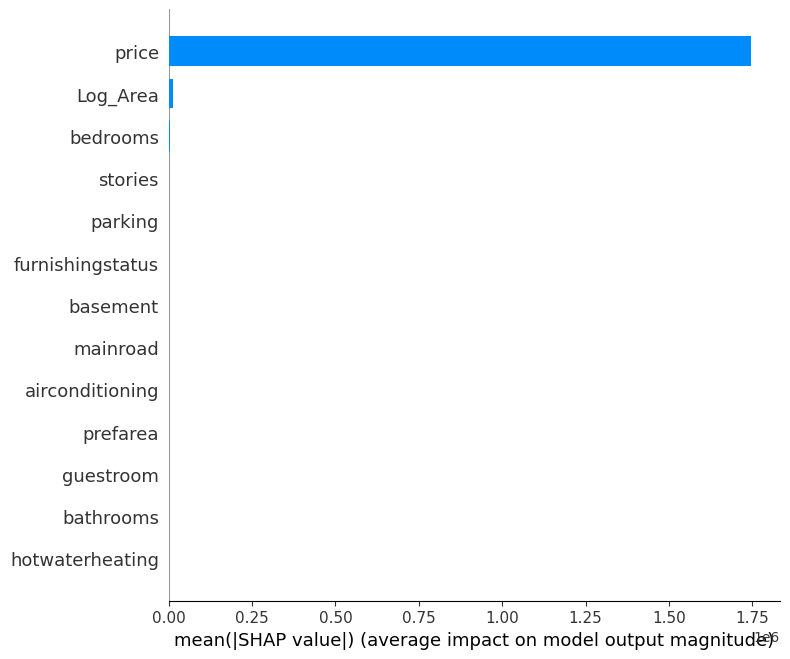

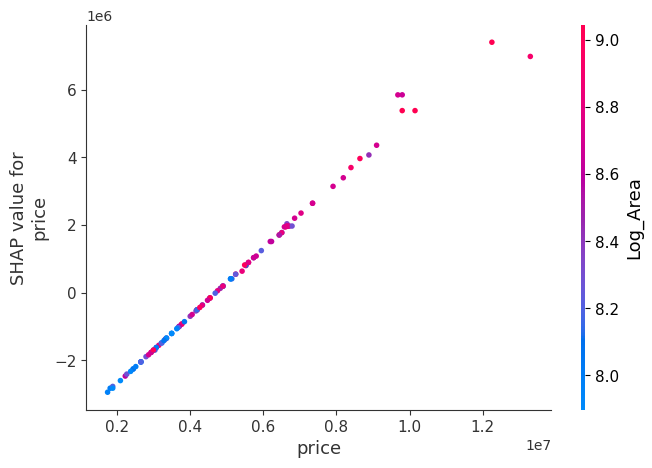

In [ ]:
import shap
import matplotlib.pyplot as plt

# Use TreeExplainer for SHAP analysis
# TreeExplainer is designed for tree-based models such as Decision Trees, Random Forests, etc.
explainer = shap.TreeExplainer(dt_model)

# Compute SHAP values for the test set (X_test)
shap_values = explainer.shap_values(X_test)

# Print the shape of SHAP values to ensure it matches the expected shape
print("SHAP values shape:", shap_values.shape)  # It should be a 2D array for regression tasks
print("X_test shape:", X_test.shape)

# SHAP summary plot - this provides a high-level view of the feature importance and how features impact the model
# It will show the distribution of SHAP values for each feature.
shap.summary_plot(shap_values, X_test)

# Comment: The summary plot shows each feature's contribution to the model prediction.
# Features are ordered based on their importance (how much they contribute to the prediction).
# The color of each dot indicates the feature value (low to high).
# Positive SHAP values mean the feature pushed the prediction higher (increased price), 
# while negative SHAP values mean the feature pushed the prediction lower (decreased price).

# SHAP bar plot - this shows the average magnitude of the SHAP values for each feature.
# It gives a clear indication of which features are the most important.
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Comment: The bar plot is useful for understanding the most important features based on their average SHAP value magnitude.
# The longer the bar, the more important the feature is for the model's decision-making.
# It helps prioritize which features to focus on in terms of interpretability.

# SHAP dependence plot - this shows the relationship between a feature's value and its SHAP value.
# It allows us to understand how a feature's impact on the prediction varies with its value.
shap.dependence_plot("price", shap_values, X_test)

# Comment: In the dependence plot, "Feature_name" should be replaced with the name of a feature you're interested in.
# The plot will show how the SHAP value (feature's contribution to the model output) changes as the feature's value changes.
# This can help us see non-linear relationships between a feature and the prediction.



In [ ]:
pip install flask scikit-learn numpy pandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import joblib

# Assuming dt_model is your trained decision tree model
joblib.dump(dt_model, 'model.pkl')


['model.pkl']